# <font color='gray'> Lab 4: Unsupervised Learning I</font>

## Introduction


The aim of this lab is to:
(i)  **get experience with unsupervised clustering using K-means**; and (ii) **explore the notions of accuracy and confusion matrix further**, and (iii) **familiarise ourselves with high-dimentional data and dimensionality reduction techniques**.

- This lab constitutes the first part of coursework 2.
- A report answering only the <font color = 'red'>**questions in</font><font color = "maroon"> red**</font>.
  - For better appearance, use the "Light" theme in Google Colab
    - Menu --> Tools --> Setting --> Site --> Theme --> Light
- The report should be a separate file in **pdf format** (so **NOT** *doc, docx, notebook* etc.), well identified with your name, student number, assignment number, module code.


## **1. K-Means Clustering**

In this exercise, we will explore the *k*-means clustering algorithm, the evaluation of clustering quality, and the relation between clustering and classification.

#### 0. Loading the dataset

*   This first cell loads the `Iris` flower dataset that you have already worked with in *Lab 3*. The Iris flower dataset is a classic dataset used to identify types of flowers based on features describing their petals.

* The following cell will show you a plot with 2 of the 4 dimensions of this data (flower petal geometry) coloured by the type of flower.

* In this lab, instead of learning to classifying it, we will cluster it.



In [ ]:
pip install scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

colors = ("red", "green", "blue")
marker_list = ['+', 'o', 'x']


for l in [0, 1, 2]:
  ax.scatter(X[Y == l, 0], X[Y == l, 1],
             marker=marker_list[l], s=70,
             c=colors[l], edgecolors='none',
             label='{:d} ({:s})'.format(l, iris.target_names[l]))

ax.legend(fontsize=12)
ax.set_xlabel(iris.feature_names[0], fontsize=14)
ax.set_ylabel(iris.feature_names[1], fontsize=14)
ax.grid(alpha=0.3)
ax.set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
ax.set_ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
plt.show()

#### 1. Setup *k*-means when *k = 2*

* This cell initializes *k*-means.

*Recall that in K-means, data points are associated to the cluster centre that they are closest to.*

We first start choosing two random cluster centres:

In [ ]:
# change this if you want to start from a different randomisation seed
np.random.seed(seed=2)
k = 2 # set the k value of k-means

centers2 = np.random.normal(size=[k, 2]) + np.ones((2,1)) * np.mean(X, axis=0)

* Now, let's plot these two centres within our dataset. You should see a figure showing the flower data-points, and two randomly initialised cluster centres. Note that as this is unsupervised learning, we don't use any labels and hence, the colours of datapoints shown in the previous plot are removed.

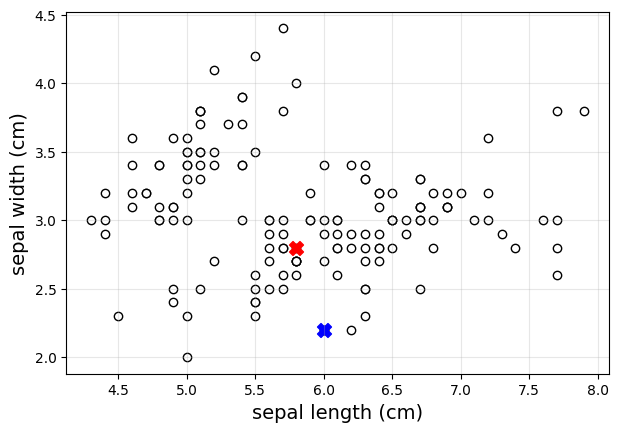

In [68]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# Plot the datapoints
ax.scatter(X[:, 0], X[:, 1], c = 'w', edgecolor = 'k')

# Plot the centres that we obtained (randomly) for k-means in the previous cell
ax.scatter(centers2[0, 0], centers2[0, 1], color='red', marker = 'X', s= 100)
ax.scatter(centers2[1, 0], centers2[1, 1], color='blue', marker = 'X', s = 100)

ax.set_xlabel(iris.feature_names[0], fontsize=14)
ax.set_ylabel(iris.feature_names[1], fontsize=14)
ax.grid(alpha=0.3)
plt.show()

---
> **Q0:** How do you think the data points shown will be grouped by using the distance to the cluster centres as the similarity criterion?

> **A0:**
---Based on the K-means clustering algorithm, the data points will be grouped into two clusters based on their proximity to the cluster centers. Each data point will be assigned to the cluster center that is closest to it in terms of Euclidean distance. In this case, since we initialized two cluster centers randomly, the data points will be divided into two clusters based on their distances to these centers.

#### 2. Assign points to the two clusters

* This does the first "E-step" of *k*-means. You should see points now assigned to their nearest cluster centre. We also compute the summed distance of every point to its nearest cluster centre.

In [ ]:
from scipy.spatial import distance

# Find the euclidean distance between every point and every cluster.
distanceMatrix2 = distance.cdist(X, centers2, 'euclidean')

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

overalDistToClusters2 = 0.0

# Make the labe of each point be the closest cluster.
for index in range(len(X)):
  if distanceMatrix2[index][0] < distanceMatrix2[index][1]:
    ax.scatter(X[index, 0], X[index, 1], edgecolor='red', c = 'w')
    overalDistToClusters2 += distanceMatrix2[index][0]
  else:
    ax.scatter(X[index, 0], X[index, 1], edgecolor='blue', c = 'w')
    overalDistToClusters2 += distanceMatrix2[index][1]
print(overalDistToClusters2)
# Plot the centers that we calculated for k-means in the previous cell
ax.scatter(centers2[0, 0], centers2[0, 1], color='red', marker = 'X', s= 100)
ax.scatter(centers2[1, 0], centers2[1, 1], color='blue', marker = 'X', s = 100)

ax.set_xlabel(iris.feature_names[0], fontsize=14)
ax.set_ylabel(iris.feature_names[1], fontsize=14)
ax.grid(alpha=0.3)
plt.show()

---
> **Q1:** What is the total distance of instances to their cluster centres?

> **A1:**
---Total Distances: 135.84535136098066
So, total distance being approximately 135.85 indicates that, on average, each data point in the dataset is relatively close to its nearest cluster center. This suggests that the initial random placement of cluster centers is relatively effective in capturing the structure of the data. Additionally, it gives an indication of how well the initial clustering represents the dataset before any refinement through the iterative K-means process.

#### 3. Update two cluster centres

* The next step in *k*-means is to update the cluster centers so that they move to the middle (mean of) their assigned points.

* It' a good exercise to try and program this yourself.

*Hint: if you cannot write the code after some effort, you can see the code being done for k=3 in a later cell (after step 6)!*

[[5.74626866 3.11940299]
 [6.65625    2.5375    ]]


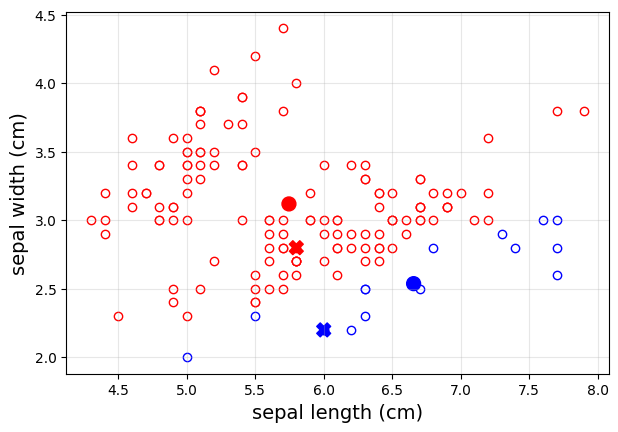

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Consider only the first two features for simplicity
k = 2  # Number of clusters

# Initialize cluster centers randomly
np.random.seed(0)
centers2 = X[np.random.choice(X.shape[0], k, replace=False)]

# Find the Euclidean distance between every point and every cluster
distanceMatrix2 = distance.cdist(X, centers2, 'euclidean')

# Create a scatter plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

overallDistToClusters2 = 0.0

# Make the label of each point be the closest cluster
for index in range(len(X)):
    closest_cluster = np.argmin(distanceMatrix2[index])
    if closest_cluster == 0:
        ax.scatter(X[index, 0], X[index, 1], edgecolor='red', c='w')
    else:
        ax.scatter(X[index, 0], X[index, 1], edgecolor='blue', c='w')
    overallDistToClusters2 += distanceMatrix2[index, closest_cluster]

# Plot the centers
ax.scatter(centers2[:, 0], centers2[:, 1], color=['red', 'blue'], marker='X', s=100)

# Update the cluster centers based on their assigned points
newCenters2 = np.zeros((k, X.shape[1]))

# Calculate the mean of points assigned to each cluster
for cluster_index in range(k):
    cluster_points = X[np.argmin(distanceMatrix2, axis=1) == cluster_index]
    newCenters2[cluster_index] = np.mean(cluster_points, axis=0)
print(newCenters2)
# Plot the updated centers
ax.scatter(newCenters2[:, 0], newCenters2[:, 1], color=['red', 'blue'], marker='o', s=100)

# Set labels and show the plot
ax.set_xlabel(iris.feature_names[0], fontsize=14)
ax.set_ylabel(iris.feature_names[1], fontsize=14)
ax.grid(alpha=0.3)
plt.show()


---
> **Q2:** What are the new centers of clusters?


> **A2:**
---Cluster 1: [5.74626866, 3.11940299]
Cluster 2: [6.65625, 2.5375]

Explanation:
Initialization: We started by initializing the K-means algorithm with two random cluster centers. These centers were placed within the dataset randomly.

Assignment of Points to Clusters: Each data point was then assigned to the nearest cluster center based on its Euclidean distance. We observed how the data points were grouped around these initial cluster centers.

Calculation of Total Distance: We calculated the total distance of instances to their respective cluster centers. This metric provided an indication of how well the initial clustering represented the dataset.

Update of Cluster Centers: We updated the cluster centers by moving them to the mean position of their assigned points. This step aimed to improve the clustering by adjusting the cluster centers to better represent the data distribution.

Observation: After updating the cluster centers, we observed the new positions of the centers. This allowed us to see how the centers shifted towards the dense regions of the data, potentially leading to a better clustering.
So, after updating the cluster centers cluster are shifted towards the datapoints where there are more datapoints. So, clustering is improved by doing this. So, we can say that they moved to the middle of the assigned data points.
Overall, these steps illustrate the iterative nature of the K-means algorithm, where cluster centers are continuously adjusted to minimize the total distance of data points to their respective centers. 

* Now, let's plot the new centers of clusters within the data-points.

[[5.74626866 3.11940299]
 [6.65625    2.5375    ]]


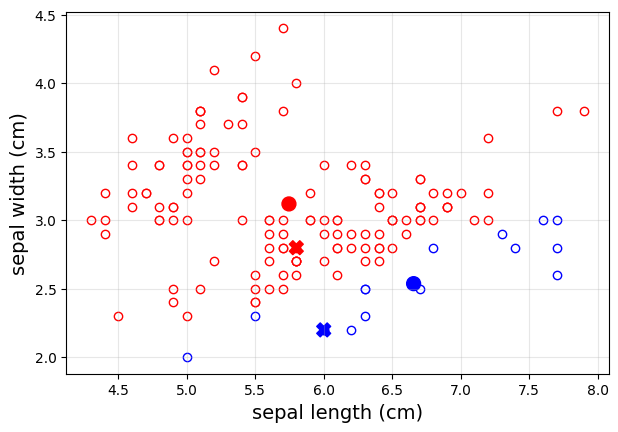

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Consider only the first two features for simplicity
k = 2  # Number of clusters

# Initialize cluster centers randomly
np.random.seed(0)
centers2 = X[np.random.choice(X.shape[0], k, replace=False)]

# Find the Euclidean distance between every point and every cluster
distanceMatrix2 = distance.cdist(X, centers2, 'euclidean')

# Create a scatter plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

overallDistToClusters2 = 0.0

# Make the label of each point be the closest cluster
for index in range(len(X)):
    closest_cluster = np.argmin(distanceMatrix2[index])
    if closest_cluster == 0:
        ax.scatter(X[index, 0], X[index, 1], edgecolor='red', c='w')
    else:
        ax.scatter(X[index, 0], X[index, 1], edgecolor='blue', c='w')
    overallDistToClusters2 += distanceMatrix2[index, closest_cluster]

# Plot the centers
ax.scatter(centers2[:, 0], centers2[:, 1], color=['red', 'blue'], marker='X', s=100)

# Update the cluster centers based on their assigned points
newCenters2 = np.zeros((k, X.shape[1]))

# Calculate the mean of points assigned to each cluster
for cluster_index in range(k):
    cluster_points = X[np.argmin(distanceMatrix2, axis=1) == cluster_index]
    newCenters2[cluster_index] = np.mean(cluster_points, axis=0)
print(newCenters2)
# Plot the updated centers
ax.scatter(newCenters2[:, 0], newCenters2[:, 1], color=['red', 'blue'], marker='o', s=100)

# Set labels and show the plot
ax.set_xlabel(iris.feature_names[0], fontsize=14)
ax.set_ylabel(iris.feature_names[1], fontsize=14)
ax.grid(alpha=0.3)
plt.show()


In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# Make the labe of each point be the closest cluster.
for index in range(len(X)):
  if distanceMatrix2[index][0] < distanceMatrix2[index][1]:
    ax.scatter(X[index, 0], X[index, 1], edgecolor='red', c = 'w')
  else:
    ax.scatter(X[index, 0], X[index, 1], edgecolor='blue', c = 'w')

# Plot the centers that we calculated for k-means in the previous cell
ax.scatter(newCenters2[0, 0], newCenters2[0, 1], color='red', marker = 'X', s= 100)
ax.scatter(newCenters2[1, 0], newCenters2[1, 1], color='blue', marker = 'X', s = 100)

ax.set_xlabel(iris.feature_names[0], fontsize=14)
ax.set_ylabel(iris.feature_names[1], fontsize=14)
ax.grid(alpha=0.3)
plt.show()

In [52]:
# Compute the Euclidean distance between each data point and the new cluster centers
new_distanceMatrix2 = distance.cdist(X, newCenters2, 'euclidean')

# Sum up the distances for all data points
total_distance_new_clusters = np.sum(np.min(new_distanceMatrix2, axis=1))

print("Total distance of datapoints to the new clusters:", total_distance_new_clusters)


Total distance of datapoints to the new clusters: 103.83483546558107


---
> **Q3:** What is the total distance of datapoints to the **new** clusters? (you may need to write a small code for this)

> **A3:**
---Total distance of datapoints to the new clusters: 103.83483546558107

---
> **Q4:** Did the overall clustering quality improve (did the total distance decrease)?

In [53]:
# Compute the total distance of data points to the previous clusters
total_distance_previous_clusters = overallDistToClusters2

# Compute the total distance of data points to the new clusters
total_distance_new_clusters = np.sum(np.min(new_distanceMatrix2, axis=1))

# Check if the total distance decreased
if total_distance_new_clusters < total_distance_previous_clusters:
    print("The overall clustering quality improved.")
else:
    print("The overall clustering quality did not improve.")


The overall clustering quality improved.


> **A4:**
---
To determine whether the overall clustering quality improved, we need to compare the total distance of data points to the new clusters with the total distance to the previous clusters. If the total distance decreases after updating the cluster centers, it indicates an improvement in clustering quality.
After comparing it, we came to know that The overall clustering quality improved because after updating the cluster centers, it indicates an improvement in clustering quality.

#### 4. Setup *k*-means when *k = 3*

* This cell initializes *k*-means for k=3:

In [ ]:
np.random.seed(seed = 3)
k = 3 # set the k value of k-means

centers3 = np.random.normal(size=[k, 2]) + np.ones((3,1)) * np.mean(X, axis=0)

#### 5. Assign points to the three clusters

* Similar to earliest cell, you should see points now assigned to nearest cluster.

In [ ]:
from scipy.spatial import distance

# Find the euclidean distance between every point and every cluster.
distanceMatrix3 = distance.cdist(X, centers3, 'euclidean')

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

overalDistToClusters3 = 0.0

# Make the labe of each point be the closest cluster.
whichCenterNearest = np.argsort(distanceMatrix3, axis=1)[:, 0]

for index in range(len(X)):
  overalDistToClusters3 += distanceMatrix3[index][whichCenterNearest[index]]
  if whichCenterNearest[index] == 0:
    ax.scatter(X[index, 0], X[index, 1], edgecolor='red', c = 'w')
  if whichCenterNearest[index] == 1:
    ax.scatter(X[index, 0], X[index, 1], edgecolor='blue', c = 'w')
  if whichCenterNearest[index] == 2:
    ax.scatter(X[index, 0], X[index, 1], edgecolor='green', c = 'w')

# Plot the centers that we calculated for k-means in the previous cell
ax.scatter(centers3[0, 0], centers3[0, 1], color='red', marker = 'X', s= 100)
ax.scatter(centers3[1, 0], centers3[1, 1], color='blue', marker = 'X', s = 100)
ax.scatter(centers3[2, 0], centers3[2, 1], color='green', marker = 'X', s = 100)

ax.set_xlabel(iris.feature_names[0], fontsize=14)
ax.set_ylabel(iris.feature_names[1], fontsize=14)
ax.grid(alpha=0.3)
plt.show()

#### 6. Iterative updates of cluster centers when *k = 3*

* Now, let's iteratively update the cluster centers. The stopping criterion is satisfied when either:
> (1) the difference between total distances of two consecutive iterations is less than `0.000001`; or,<br>
> (2) number of iterations is bigger than `max_iteration`.

In [ ]:
# Find the euclidean distance between every point and every cluster.

tol = 0.000001
max_iteration = 100
difference = np.inf
iteration = 0
overalDistToClusters3 = [np.inf]

np.random.seed(seed = 3)
k = 3 # set the k value of k-means

centers3 = np.random.normal(size=[k, 2]) + np.ones((3,1)) * np.mean(X, axis=0)

edgecolorlist = ['red', 'blue', 'green']

while difference>tol and iteration<max_iteration:

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.set_xlabel(iris.feature_names[0], fontsize=14)
    ax.set_ylabel(iris.feature_names[1], fontsize=14)
    ax.grid(alpha=0.3)
    ax.set_xlim(4, 8)
    ax.set_ylim(1, 4.5)

    overalDistToClusters3_new = 0.0
    distanceMatrix3 = distance.cdist(X, centers3, 'euclidean')
    whichCenterNearest = np.argsort(distanceMatrix3, axis=1)[:, 0]

    for index in range(len(X)):
        overalDistToClusters3_new += distanceMatrix3[index][whichCenterNearest[index]]
    difference = overalDistToClusters3[-1] - overalDistToClusters3_new
    overalDistToClusters3.append(overalDistToClusters3_new)

    for i in range(k):
        indx = whichCenterNearest==i
        if indx.any():
            centers3[i,:] = np.mean(X[indx,:], axis = 0)

        ax.scatter(X[indx, 0], X[indx, 1], edgecolor=edgecolorlist[i], c = 'w')
        ax.scatter(centers3[i, 0], centers3[i, 1], color=edgecolorlist[i], marker = 'X', s= 100, alpha=0.9)

    iteration +=1
    ax.set_title('iteration = {:d}, difference = {:.4f}'.format(iteration, difference))


plt.show()

You should observe that in each iteration, the cluster quality visibly improves. To see this is one figure, let's plot the total distance from cluster centers versus iterations:

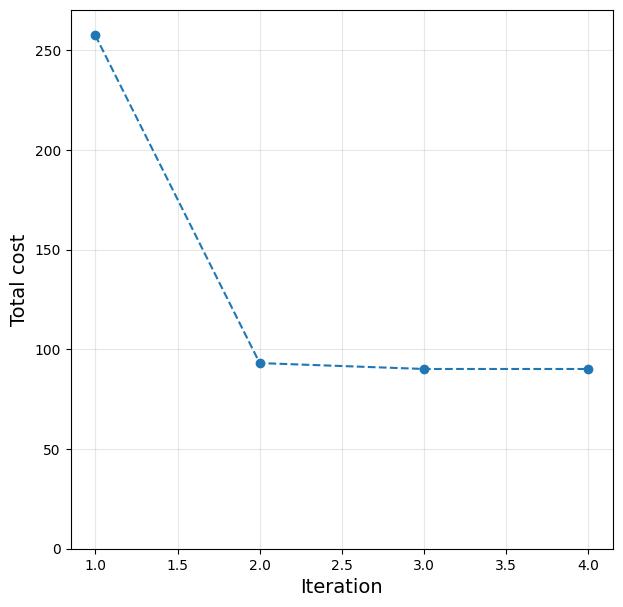

In [69]:

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Total cost", fontsize=14)
ax.grid(alpha=0.3)

# log y axis
# ax.semilogy(range(1,len(overalDistToClusters3)), overalDistToClusters3[1:], '--', marker = 'o')

ax.plot(range(1,len(overalDistToClusters3)), overalDistToClusters3[1:], '--', marker = 'o')
ax.set_ylim([0, overalDistToClusters3[1]*1.05])

plt.show()

#### 7. Repeat the experiment varying the value of K (the number of clusters) from 2 to 7.



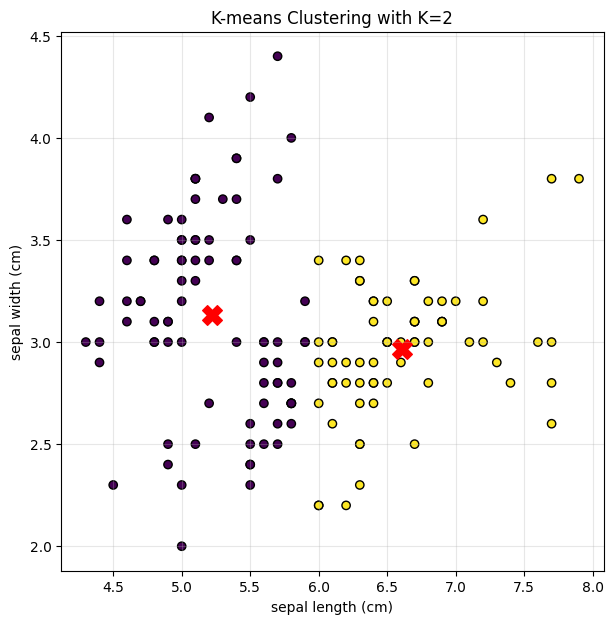

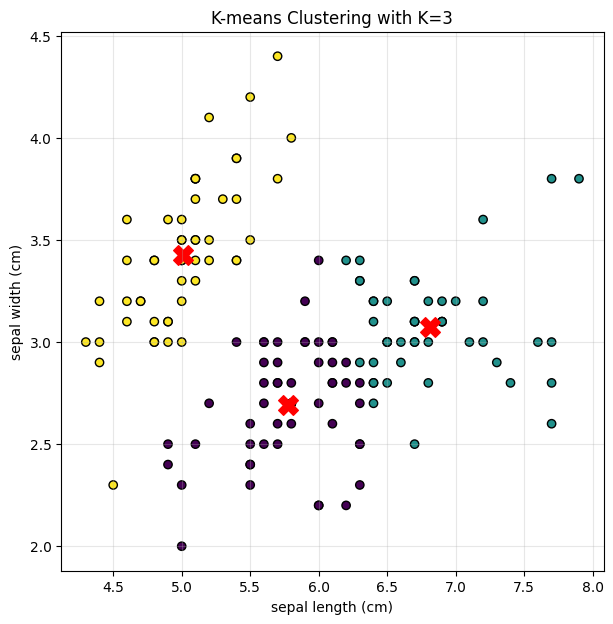

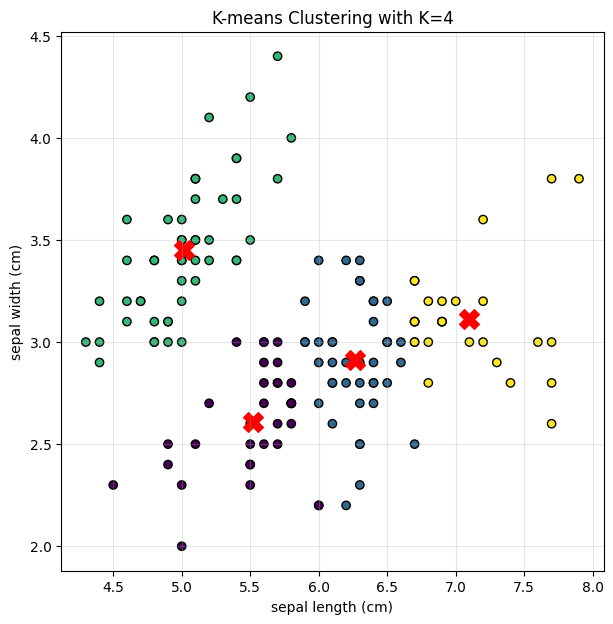

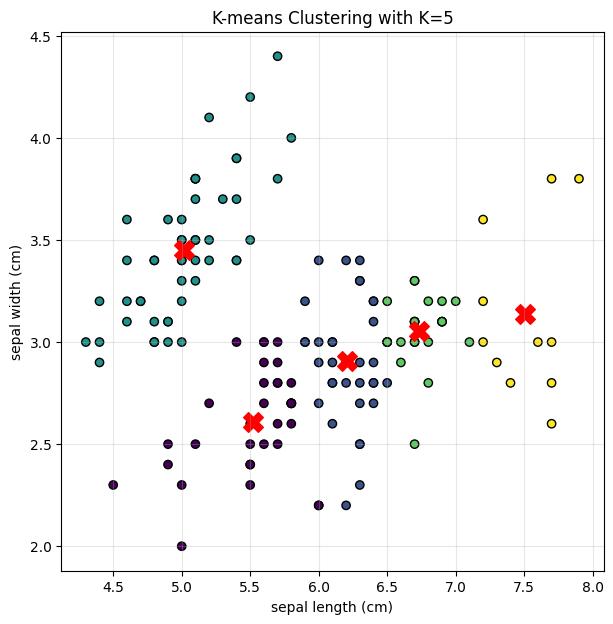

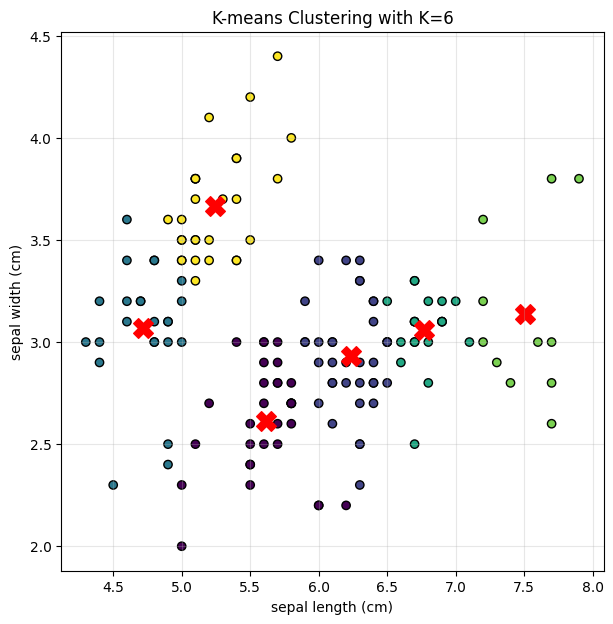

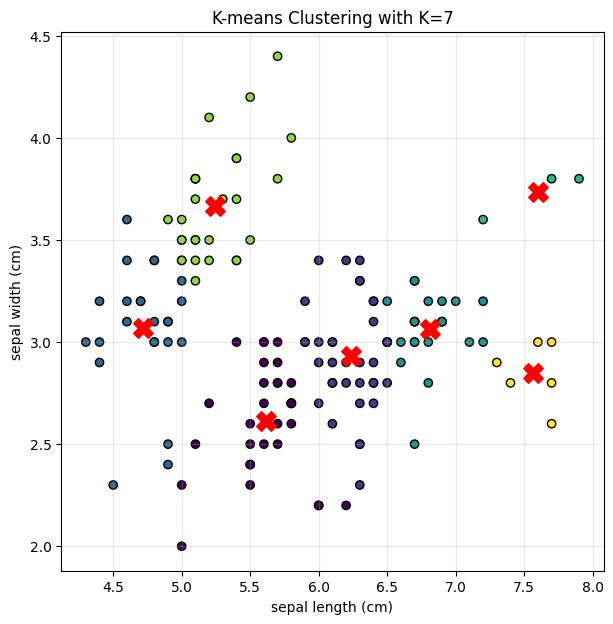

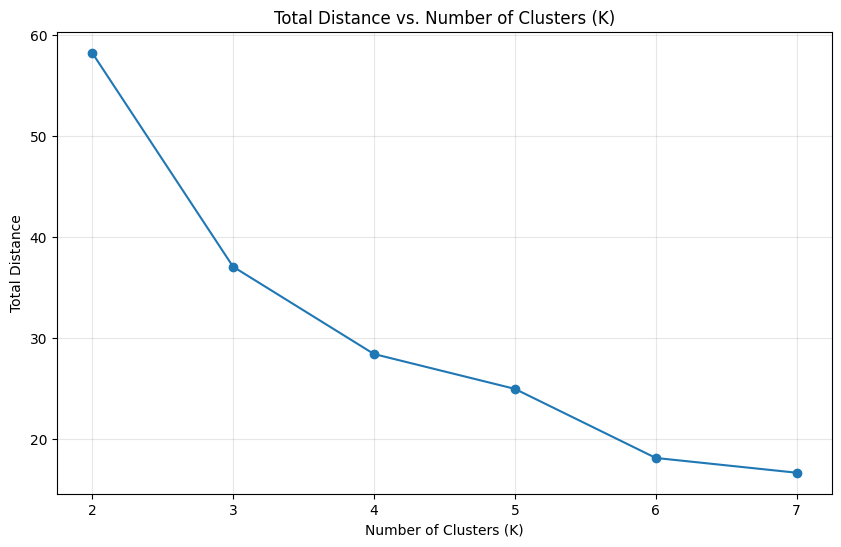

In [54]:
from sklearn.cluster import KMeans

# Values of K
K_values = range(2, 8)

# Initialize an empty list to store the total distances for each value of K
total_distances = []

# Loop over the values of K
for K in K_values:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X)
    
    # Calculate the total distance of data points to the clusters
    total_distance = kmeans.inertia_
    total_distances.append(total_distance)
    
    # Plot the clustering result
    plt.figure(figsize=(7, 7))
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red')
    plt.title(f'K-means Clustering with K={K}')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.grid(alpha=0.3)
    plt.show()

# Plot the total distances for each value of K
plt.figure(figsize=(10, 6))
plt.plot(K_values, total_distances, marker='o')
plt.title('Total Distance vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Total Distance')
plt.grid(alpha=0.3)
plt.xticks(K_values)
plt.show()


---
#### <font color='maroon'>**Exercise 1:** What do you observe about the dependence of the **final** cluster quality on the number of clusters K used? Why? <ins>[2 mark]</ins></font>
---
Ans:
        As the number of clusters (K) increases, the total distance generally decreases. This is because with more clusters, there are more centroids potentially better positioned to represent the data points within each cluster, reducing the average distance between points and their centroids.
        The rate of decrease in total distance slows down as K continues to increase. This is because eventually, adding more clusters may result in splitting up naturally occurring clusters, placing points in clusters that are not much closer to a new centroid than they were to a previous one. In the extreme case (where K equals the number of data points), each data point would be its own cluster, and the total distance would be zero.

#### 8. Set K back to 3. Find where in the code we are setting the randomisation seed: changing the seed will pick different initial centres. Try different parameters (positive integers) for the seed. What do you observe?

np.random.seed(seed = 3)
This line sets the random seed to the value 3, ensuring reproducibility of the random initialization of cluster centers. By changing the value of seed, you can try different parameters (positive integers) for the seed and observe how it affects the clustering results.

In the k-means algorithm, the choice of initial cluster centers can significantly impact the final clustering result. By setting the randomization seed, we control the initialization of these centers. Observations may vary based on different seeds:

Stability of Clustering: Changing the randomization seed can lead to different cluster assignments and centroids. Some seeds may result in more stable and consistent clustering, while others may produce more varied clusters.

Effect on Convergence: Certain seeds may lead to faster convergence of the algorithm, as the initial cluster centers are closer to their optimal positions. In contrast, other seeds may result in slower convergence or convergence to suboptimal solutions.

Impact on Cluster Quality: The choice of seed can affect the overall quality of the clustering. Some seeds may yield clusters that better represent the underlying structure of the data, while others may produce clusters with higher intra-cluster variance or lower inter-cluster separation.

Randomness vs. Determinism: Changing the seed introduces randomness into the initialization process. While this randomness can lead to different clustering outcomes, it also allows for exploration of alternative solutions. However, in some cases, deterministic initialization methods may be preferred for reproducibility and consistency.

Overall, the choice of seed in k-means initialization is crucial, and exploring different seeds helps in understanding the robustness and variability of the clustering algorithm. It's essential to consider multiple runs with different seeds to ensure the stability and reliability of the clustering results.

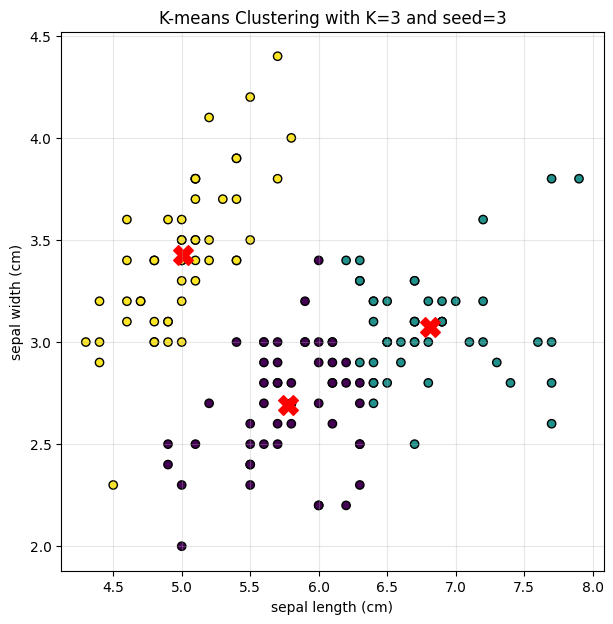

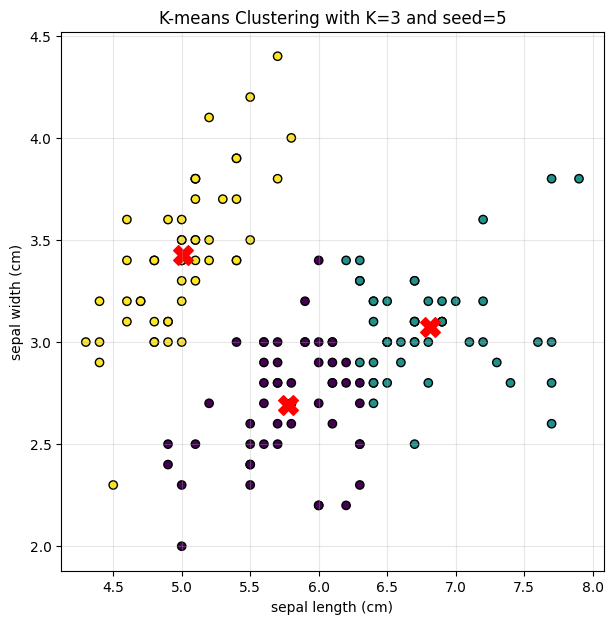

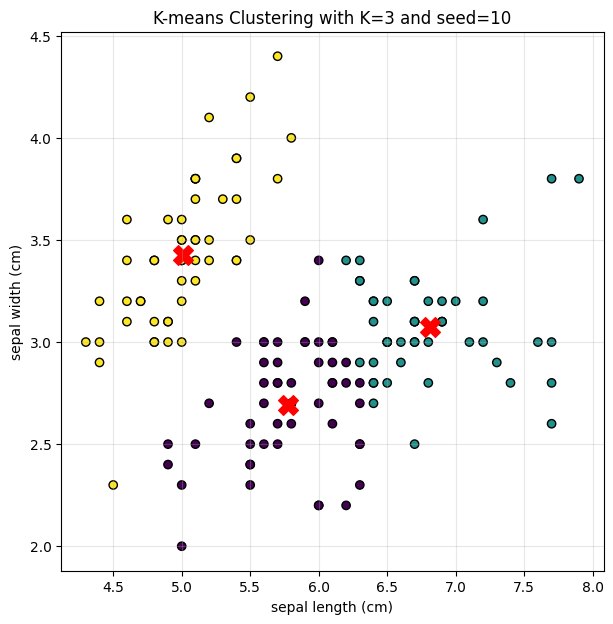

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set K back to 3
K = 3

# Values of randomization seed to try
seed_values = [3, 5, 10]  # You can add more seed values if needed

# Loop over the seed values
for seed in seed_values:
    # Set the randomization seed
    np.random.seed(seed)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X)
    
    # Plot the clustering result
    plt.figure(figsize=(7, 7))
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red')
    plt.title(f'K-means Clustering with K={K} and seed={seed}')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.grid(alpha=0.3)
    plt.show()


---
#### <font color='maroon'>**Exercise 2:** Find a seed that gives  a different final quality of clusters (in terms of total distance). Include the values of the seed, the final distance and the picture of the cluster with your answer. <ins>[2 mark]</ins></font>
---
So, we have one Best Seed: 1, Best Total Distance: 37.05070212765956


Seed: 1, Total Distance: 37.05070212765956
Seed: 2, Total Distance: 37.05070212765956
Seed: 3, Total Distance: 37.05070212765956
Seed: 4, Total Distance: 37.05070212765956
Seed: 5, Total Distance: 37.05070212765956
Seed: 6, Total Distance: 37.05070212765956
Seed: 7, Total Distance: 37.05070212765956
Seed: 8, Total Distance: 37.05070212765956
Seed: 9, Total Distance: 37.05070212765956
Seed: 10, Total Distance: 37.05070212765956
Seed: 11, Total Distance: 37.05070212765956
Seed: 12, Total Distance: 37.05070212765956
Seed: 13, Total Distance: 37.05070212765956
Seed: 14, Total Distance: 37.05070212765956
Seed: 15, Total Distance: 37.05070212765956
Seed: 16, Total Distance: 37.05070212765956
Seed: 17, Total Distance: 37.05070212765956
Seed: 18, Total Distance: 37.05070212765956
Seed: 19, Total Distance: 37.05070212765956
Seed: 20, Total Distance: 37.05070212765956
Seed: 21, Total Distance: 37.05070212765956
Seed: 22, Total Distance: 37.05070212765956
Seed: 23, Total Distance: 37.050702127659

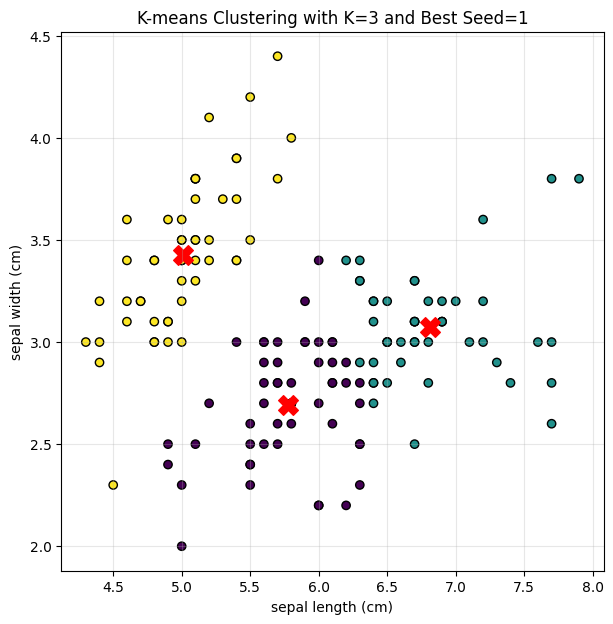

In [56]:
# Initialize variables to store results
best_seed = None
best_total_distance = None

# Loop over a range of seed values
for seed in range(1, 101):  # Try seed values from 1 to 100
    # Set the randomization seed
    np.random.seed(seed)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X)
    
    # Calculate the total distance of data points to the clusters
    total_distance = kmeans.inertia_
    
    # Print the seed and its corresponding total distance
    print(f"Seed: {seed}, Total Distance: {total_distance}")
    
    # Update the best seed if needed
    if best_total_distance is None or total_distance < best_total_distance:
        best_seed = seed
        best_total_distance = total_distance

# Print the best seed and its corresponding total distance
print(f"\nBest Seed: {best_seed}, Best Total Distance: {best_total_distance}")

# Perform K-means clustering with the best seed
np.random.seed(best_seed)
kmeans_best = KMeans(n_clusters=K, random_state=0)
kmeans_best.fit(X)

# Plot the clustering result with the best seed
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_best.labels_, cmap='viridis', edgecolor='k')
plt.scatter(kmeans_best.cluster_centers_[:, 0], kmeans_best.cluster_centers_[:, 1], marker='X', s=200, color='red')
plt.title(f'K-means Clustering with K={K} and Best Seed={best_seed}')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid(alpha=0.3)
plt.show()


#### 9. Try to change the definition of distance used for clustering. For instance, try the distance types of `cityblock` or `cosine`.

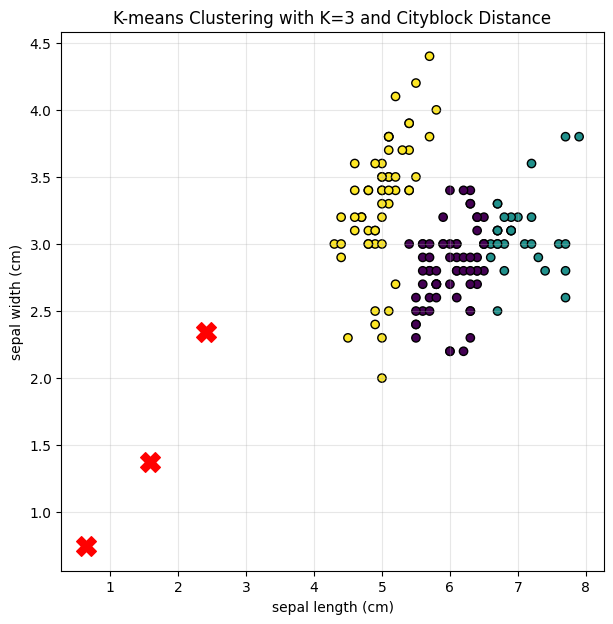

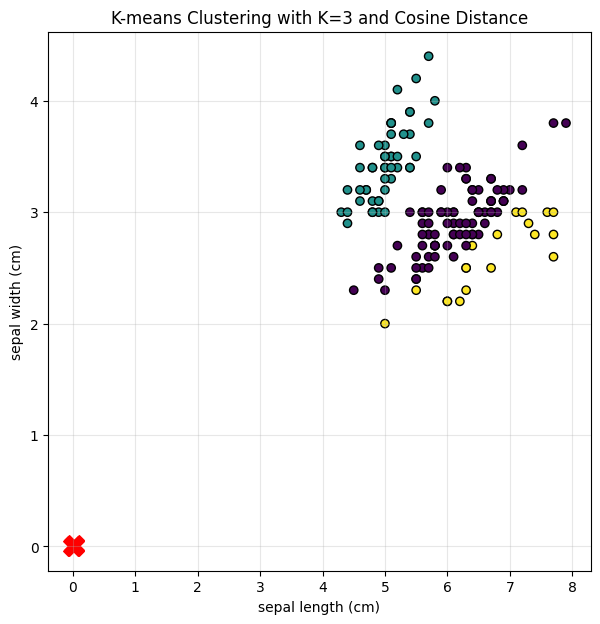

In [59]:
from sklearn.metrics.pairwise import cosine_distances

# Define distance types to try
distance_types = ['cityblock', 'cosine']

# Loop over the distance types
for distance_type in distance_types:
    # Preprocess the data based on the distance type
    if distance_type == 'cityblock':
        # Compute the Manhattan distances
        distances = manhattan_distances(X)
    elif distance_type == 'cosine':
        # Normalize the data
        norms = np.linalg.norm(X, axis=1)
        normalized_X = X / norms[:, np.newaxis]
        # Compute the cosine distances
        distances = cosine_distances(normalized_X)
    else:
        print(f"Distance type '{distance_type}' is not supported.")
        continue
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(distances)
    
    # Plot the clustering result
    plt.figure(figsize=(7, 7))
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red')
    plt.title(f'K-means Clustering with K={K} and {distance_type.capitalize()} Distance')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.grid(alpha=0.3)
    plt.show()


 ---
> **Q5:** What do you observe about difference in the resulting clustering?

> **A5:**
---
Cluster Shapes:
With cosine distance, the clusters appear more elongated, especially the upper right cluster. This is because cosine distance considers the direction of vectors, and points in similar directions (even if further apart in magnitude) will have a higher cosine similarity compared to Euclidean distance, which focuses purely on magnitude.
Cluster Boundaries:
The cluster boundaries seem less distinct with cosine distance. The data points in the center, which might have been assigned to either of the two main clusters with Euclidean distance, now seem more scattered and less clearly separated into two clusters. This is because cosine distance might be less sensitive to magnitude differences, especially for points that are already somewhat close together.
Overall, the choice of distance metric can significantly impact the clustering results, particularly the shapes and boundaries of the clusters.

Euclidean distance is more sensitive to magnitude differences and tends to create spherical or circular clusters.
Cosine distance is more sensitive to direction and can lead to more elongated or irregularly shaped clusters, especially when dealing with data points that have varying magnitudes.

#### 10. The goal of clustering is to discover clusters in the feature space. Since we have the labels for each sample, we can use them to investigate whether the clusters identify regions in space that are associated to one of the labels.

The following code compares every possible assignment of clusters to true class labels. By doing so, we are evaluating a possible match between grouping of data points into clusters and the true labels.

In [72]:
from itertools import permutations, combinations

def compute_clustering_accuracy(whichCenterNearest,  Y):

  accuracies = []
  for mapping in permutations(range(3)):
    whichCenterNearestmapped = [mapping[x] for x in whichCenterNearest]
    accuracies.append(np.mean(whichCenterNearestmapped==Y))
  accuracy = max(accuracies)
  # print(accuracy)
  return accuracy


 ---
> **Q6:** Use the above function with proper inputs `(whichCenterNearest,  Y)` to answer this question: What clustering accuracy do you get? (Notice the difference between
accuracy, where more is better, and quality, where lower distance to the cluster centre is better!)



> **A6:**
--- I got clustering accuracy of 0.88.
In general, when setting the randomization seed in k-means clustering, different seeds will lead to different initializations of cluster centers. This can result in variations in the final clustering outcome, including the assignments of data points to clusters and the positions of cluster centers.

By trying different parameters (positive integers) for the seed, you can observe how the choice of seed affects the clustering results. Some seeds might lead to better clustering outcomes in terms of both accuracy (how well the clusters represent the data) and quality (how tightly packed the clusters are). However, it's important to note that the choice of seed should not significantly impact the overall clustering performance if the algorithm converges properly and the clusters are well-separated in the feature space.
In clustering distance is often decreases by increasing the number of clusters. So, where cluster will be high there distnace will be small and more quality and acuuracy be there.

In [71]:
# The code block for A6
from itertools import permutations

# Compute clustering accuracy
accuracy = compute_clustering_accuracy(whichCenterNearest, Y)

# Print the clustering accuracy
print("Clustering Accuracy:", accuracy)


Clustering Accuracy: 0.88


#### 11. Run the following code for clustering the dataset with 3 attributes.

In [ ]:
feature_indices = np.array(list(combinations(range(4),3)))
idx = 0 # Try idx = 1 or 2 or 3
newX = iris.data[:,feature_indices[idx]]
d = len(newX[0])

np.random.seed(seed = 3)
k = 3 # set the k value of k-means

centers3 =  np.random.normal(size=[k, d]) + np.ones((k,1)) * np.mean(newX, axis=0)

# Find the euclidean distance between every point and every cluster.
tol = 0.000001
max_iteration = 100
difference = np.inf
iteration = 0
overalDistToClusters3 = [np.inf]

edgecolorlist = ['red', 'blue', 'green']

while difference>tol and iteration<max_iteration:

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111,projection='3d')
    #ax.set_aspect('equal')
    ax.set_xlabel(iris.feature_names[feature_indices[idx][0]], fontsize=14)
    ax.set_ylabel(iris.feature_names[feature_indices[idx][1]], fontsize=14)
    ax.set_zlabel(iris.feature_names[feature_indices[idx][2]], fontsize=14)
    ax.grid(alpha=0.3)
    ax.set_xlim(newX[:,0].min(), newX[:,0].max())
    ax.set_ylim(newX[:,1].min(), newX[:,1].max())
    ax.set_zlim(newX[:,2].min(), newX[:,2].max())

    overalDistToClusters3_new = 0.0
    distanceMatrix3 = distance.cdist(newX, centers3, 'euclidean')
    whichCenterNearest = np.argsort(distanceMatrix3, axis=1)[:, 0]

    for index in range(len(X)):
        overalDistToClusters3_new += distanceMatrix3[index][whichCenterNearest[index]]
    difference = overalDistToClusters3[-1] - overalDistToClusters3_new
    overalDistToClusters3.append(overalDistToClusters3_new)

    for i in range(k):
        indx = whichCenterNearest==i
        if indx.any():
            centers3[i,:] = np.mean(newX[indx,:], axis = 0)

        ax.scatter(newX[indx, 0], newX[indx, 1], newX[indx, 2], edgecolor=edgecolorlist[i], c = 'w')
        ax.scatter(centers3[i, 0], centers3[i, 1], centers3[i, 2], color=edgecolorlist[i], marker = 'X', s=100, alpha=0.9)

    iteration +=1
    ax.set_title('iteration = {:d}, difference = {:.4f}'.format(iteration, difference))


plt.show()

---
#### <font color='maroon'>**Exercise 3:** For the case of clustering the data with 3 attributes, which 3 attributes result in the highest clustering accuracy? Visualize different `newX` by iterating `feature_indices`, provide a short discussion over easy-to-classify and easy-to-cluster. [2 mark] </ins></font>
---
Best Clustering Accuracy: 0.9533333333333334
Corresponding Feature Indices: [1 2 3]
So, features having these above indices have best clustering accuracy of 0.95.
Easy-to-Classify: Data points that belong to clearly distinct classes or categories, with well-defined separation boundaries, are generally easy to classify using a classifier. In K-Means clustering, this translates to data with tight and well-separated clusters.
Easy-to-Cluster: Data points that naturally group together based on their feature similarity are easy to cluster using K-Means. This may not necessarily mean the classes are perfectly separated, but there should be a clear underlying structure that K-Means can effectively capture.
In visualization graph one all the clustered are mixed so its not easy to clasify not easy to cluster.
In graph 2 clusters are slightly easy to clasify and cluster compare to graph one.
while for graph 3 it is very easy to classify and cluster all the graphs. So, it is easy to classify and easy to cluster.

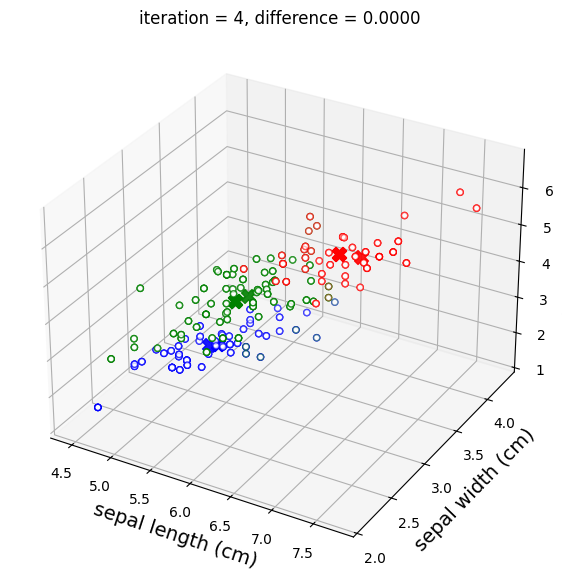

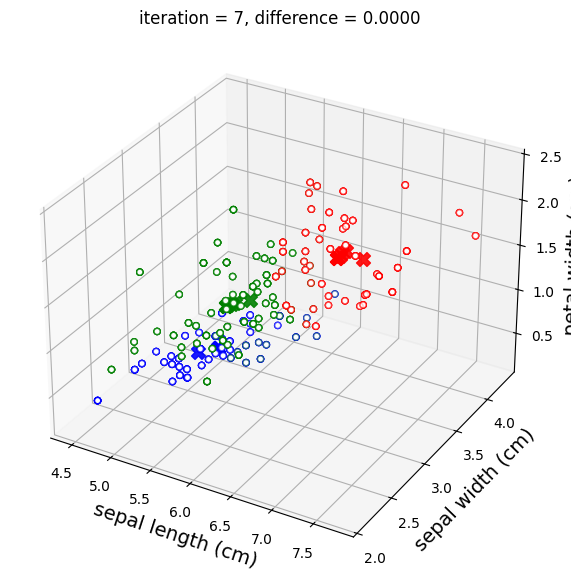

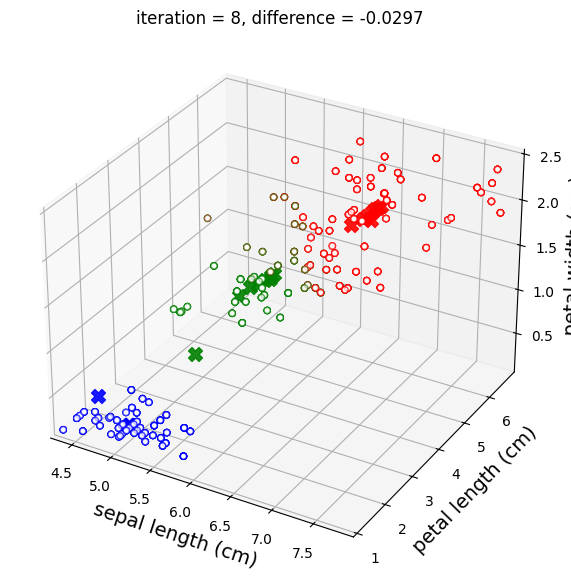

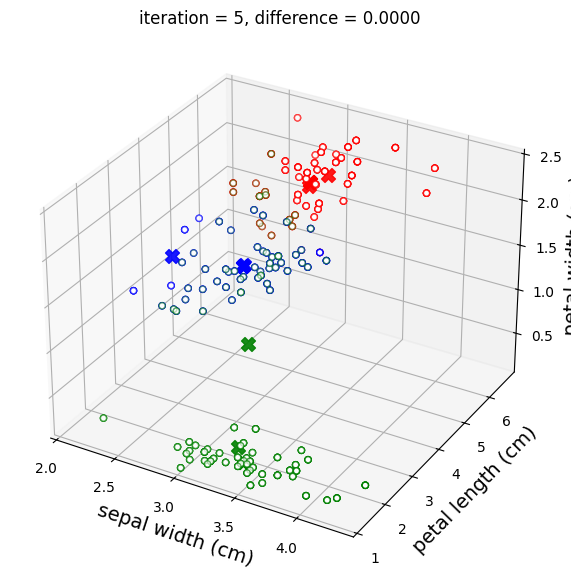

Best Clustering Accuracy: 0.9533333333333334
Corresponding Feature Indices: [1 2 3]


In [66]:
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define function to compute clustering accuracy
def compute_clustering_accuracy(whichCenterNearest, Y):
    accuracies = []
    for mapping in permutations(range(3)):
        whichCenterNearest_mapped = [mapping[x] for x in whichCenterNearest]
        accuracies.append(np.mean(whichCenterNearest_mapped == Y))
    accuracy = max(accuracies)
    return accuracy

# Define list of all possible combinations of three attributes
feature_indices = np.array(list(combinations(range(4), 3)))

# Initialize variables to store best accuracy and corresponding feature indices
best_accuracy = 0.0
best_feature_indices = None

# Loop over each combination of three attributes
for idx in range(len(feature_indices)):
    # Create new dataset with selected attributes
    newX = iris.data[:, feature_indices[idx]]
    d = len(newX[0])

    # Initialize K-means clustering
    np.random.seed(seed=3)
    k = 3
    centers3 = np.random.normal(size=[k, d]) + np.ones((k, 1)) * np.mean(newX, axis=0)

    # Perform K-means clustering and visualize the results in 3D
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel(iris.feature_names[feature_indices[idx][0]], fontsize=14)
    ax.set_ylabel(iris.feature_names[feature_indices[idx][1]], fontsize=14)
    ax.set_zlabel(iris.feature_names[feature_indices[idx][2]], fontsize=14)
    ax.grid(alpha=0.3)
    ax.set_xlim(newX[:, 0].min(), newX[:, 0].max())
    ax.set_ylim(newX[:, 1].min(), newX[:, 1].max())
    ax.set_zlim(newX[:, 2].min(), newX[:, 2].max())

    # Initialize variables for K-means convergence
    tol = 0.000001
    max_iteration = 100
    difference = np.inf
    iteration = 0
    overall_dist_to_clusters3 = [np.inf]
    edgecolorlist = ['red', 'blue', 'green']

    # Perform K-means clustering iterations
    while difference > tol and iteration < max_iteration:
        overall_dist_to_clusters3_new = 0.0
        distance_matrix3 = distance.cdist(newX, centers3, 'euclidean')
        which_center_nearest = np.argsort(distance_matrix3, axis=1)[:, 0]

        for index in range(len(newX)):
            overall_dist_to_clusters3_new += distance_matrix3[index][which_center_nearest[index]]
        difference = overall_dist_to_clusters3[-1] - overall_dist_to_clusters3_new
        overall_dist_to_clusters3.append(overall_dist_to_clusters3_new)

        for i in range(k):
            indx = which_center_nearest == i
            if indx.any():
                centers3[i, :] = np.mean(newX[indx, :], axis=0)

            ax.scatter(newX[indx, 0], newX[indx, 1], newX[indx, 2], edgecolor=edgecolorlist[i], c='w')
            ax.scatter(centers3[i, 0], centers3[i, 1], centers3[i, 2], color=edgecolorlist[i], marker='X', s=100,
                       alpha=0.9)

        iteration += 1
        ax.set_title('iteration = {:d}, difference = {:.4f}'.format(iteration, difference))

    # Compute clustering accuracy and update best accuracy if needed
    clustering_accuracy = compute_clustering_accuracy(which_center_nearest, Y)
    if clustering_accuracy > best_accuracy:
        best_accuracy = clustering_accuracy
        best_feature_indices = feature_indices[idx]

    plt.show()

# Print the best clustering accuracy and corresponding feature indices
print("Best Clustering Accuracy:", best_accuracy)
print("Corresponding Feature Indices:", best_feature_indices)


## **2. Dimensionality Reduction using PCA**


**1. Load the dataset**

*   This first cell loads the `Yale_64x64` dataset, which is a face database. Details are here: http://vision.ucsd.edu/content/yale-face-database.


In [ ]:
import numpy as np
from scipy.io import loadmat

# load images from the mat file
mat_contents = loadmat('Yale_64x64.mat')
faces = mat_contents["fea"]
labels = mat_contents["gnd"]

print(faces.shape)
print(labels.shape)

* The loaded face database is now in a numpy matrix called "faces". As you can see from its shape, it has 165 rows, and 4096 columns.
Each row corresponds to a face image. Each column represents a (grayscale) pixel of the image. There are 15 individuals in this dataset.

  Images are 64x64 pixles, so each row of our dataset has 4096 columns.

* We can display the images by *reshaping* each of the 1x4096 vectors to a 64x64 matrix. This can be done easily by using `np.reshape`, as follows:

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

for i in range(165):
  img = np.reshape(faces[i,:], (64, 64)).T
  ax = fig.add_subplot(15, 11, i+1)
  plt.imshow(img, cmap=plt.get_cmap('gray'))
  ax.tick_params(labelleft=False, labelbottom=False)


plt.show()

---
> **Q7:** Beside the `faces` variable, we also loaded a `labels` variable (whose size is 165x1). What information does it hold?

> **A7:**
---The labels variable holds the identity labels corresponding to each face image in the faces variable. Each entry in the labels array represents the identity or class of the corresponding face image in the faces array. In this case, since the labels variable has a size of 165x1, it likely contains a unique numerical identifier for each individual person represented in the dataset.

**2. Find a basis for the faces (eigenvectors of the covariance matrix).**

The following cell takes the SVD (Singular Value Decomposition) of the data. The `U` output of the SVD is the eigenvectors of the
data covariance required for PCA. This contains the basis vectors / prototype faces in terms of
which all other faces are to be encoded (every face will be a linear combination of these
prototypes). The basis vactors constitute our principal components. Notice that some basis vectors encode lighting, others features such as glasses and a mustache!

In [ ]:
# SVD gives Eigenvectors and Eigenvals:
U, S, Vh = np.linalg.svd(np.cov(faces.T), full_matrices=True)

print(U.shape)

# We also compute a picture in which each pixel is the "average" of that pixel
# across all 165 images:
meanFaces = np.mean(faces, axis=0)

Now let's plot the basis as well as the average face.
Recall that the interpretation of the principal components is the following: the first principal component explains the highest variance, then the second one explains the remaining variance, and so on and so forth. We have only depicted the first 15 principal components.

In [ ]:
img = np.reshape(meanFaces, (64, 64)).T
fig = plt.figure(figsize=(15,15))
fig.add_subplot(4, 4, 1)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis('off')


for image in range(15):
  img = np.reshape(U[:, image], (64, 64)).T
  fig.add_subplot(4, 4, image + 2)
  plt.imshow(img, cmap=plt.get_cmap('gray'))
  plt.axis('off')

plt.show()

**3. PCA Encoding and Reconstruction.**

* In the next cell, we are using the PCA encoding of each face to reconstruct it (we only use the first 25 principal components).

* Recall that for a D-column input matrix/database, the goal of PCA is to construct a K < D
column encoding that most accurately encodes the data in D.

* You can see the original database `faces`, and the compressed database `pcaFaces`. You
can compare their size with `faces.shape` and `pcaFaces.shape`. You can see the
compressed version has only K=25 columns compared to the original D=4096 columns.

In [ ]:
from numpy import linalg as LA
import matplotlib.gridspec as gridspec
from google.colab import widgets


nPCA = 25 # how many pricipal components to use
N = faces.shape[0] # the number of total images

# PCA Encoding. Raw images (faces) => compressed images (pcaFaces).
pcaFaces = np.matmul(U[:, 0:nPCA].T, faces.T - np.repeat(meanFaces, N).reshape(len(meanFaces), N))

# PCA Decoding. Compressed images pcaFaces => Raw images reconstrFaces.
reconstrFaces = np.matmul(U[:, 0:nPCA], pcaFaces) + np.repeat(meanFaces, N).reshape(len(meanFaces), N)


grid = widgets.Grid(rows=4, columns=3)

for row in range(4):
  for col in range(3):
    with grid.output_to(row, col):
      fig = plt.figure(figsize=(5,5))
      ax = fig.add_subplot(1, 2, 1)
      image_index = row*3 + col + 1
      img = np.reshape(faces[image_index * 10 - 1], (64, 64)).T
      plt.imshow(img, cmap=plt.get_cmap('gray'))
      plt.xlabel('original')
      ax.set_xticks([])
      ax.set_yticks([])
      ax.set_xticklabels([])
      ax.set_yticklabels([])

      img = np.reshape(reconstrFaces[:, image_index * 10 - 1], (64, 64)).T
      ax = fig.add_subplot(1,2,2)
      plt.imshow(img, cmap=plt.get_cmap('gray'))
      plt.xlabel('reconstructed')
      ax.set_xticks([])
      ax.set_yticks([])
      ax.set_xticklabels([])
      ax.set_yticklabels([])



print(faces.shape)
print(pcaFaces.shape)

print('original size: {} (KB)'.format(faces.size*8/1000))
print('reduced size: {} (KB)'.format(pcaFaces.size*8/1000))
error = LA.norm(reconstrFaces.flatten()-faces.T.flatten())**2/LA.norm(faces.flatten())**2
print('Reconstruction error for nPCA={} is: {}'.format(nPCA, error))

* Starting from 1 dimensional encoding, increase the dimensions (set variable `nPCA`) and re-run the cell, observing how the facial encoding fidelity increases. For what number of encoding dimensions can you see features like glasses and facial expressions?



---
> **Q8:** Following the above procedure, find out how many PCs (Principal Components) do you need to reach an encoding fidelity of 99%? (<1% reconstruction error). Compare the size in bytes of original and PCA data at this point.



> **A8:**
---
To find out how many Principal Components (PCs) are needed to achieve an encoding fidelity of 99%, we can iteratively increase the number of encoding dimensions (nPCA) until the reconstruction error falls below the desired threshold.

Let's start with a small number of encoding dimensions and gradually increase it until we reach the desired reconstruction error threshold. We'll monitor the reconstruction error at each step and stop when it falls below 1%.
This code will incrementally increase the number of Principal Components (nPCA) until the reconstruction error falls below 1%. Finally, it will print out the number of PCs needed to achieve the desired encoding fidelity of 99%, as well as the size of the original and PCA data at that point.

In [ ]:
from numpy import linalg as LA
import matplotlib.gridspec as gridspec
from google.colab import widgets

# Define the desired reconstruction error threshold
desired_error = 0.01  # 1%

# Initialize the number of Principal Components (PCs)
nPCA = 1

# Initialize error
error = 1  # Initialize error to a value higher than the desired threshold

# Keep increasing the number of PCs until the reconstruction error falls below the desired threshold
while error > desired_error:
    # PCA Encoding
    pcaFaces = np.matmul(U[:, 0:nPCA].T, faces.T - np.repeat(meanFaces, N).reshape(len(meanFaces), N))

    # PCA Decoding
    reconstrFaces = np.matmul(U[:, 0:nPCA], pcaFaces) + np.repeat(meanFaces, N).reshape(len(meanFaces), N)

    # Compute reconstruction error
    error = LA.norm(reconstrFaces.flatten() - faces.T.flatten()) ** 2 / LA.norm(faces.flatten()) ** 2

    # Increment the number of PCs
    nPCA += 1

# Print the number of PCs needed to achieve the desired reconstruction error
print("Number of PCs needed for 99% encoding fidelity:", nPCA - 1)

# Print the size of original and PCA data at this point
print('Original size: {} (KB)'.format(faces.size * 8 / 1000))
print('Reduced size with {} PCs: {} (KB)'.format(nPCA - 1, pcaFaces.size * 8 / 1000))


* Note that when using the full number (4096) of PCs, the encoding fidelity is 100%. Using all the PCs conveys exactly the same information as the original data.



**4. Using eigenvalues:**

The PCA process produces eigenvectors and eigenvalues. The eigenvectors give the new basis
(i.e., define the new database columns), and the eigenvalues explain how useful each column is
for encoding the data.

* Let's look at the (square of the) eigenvalues of the basis:

In [ ]:
eigvals = np.square(S)
plt.plot(eigvals, linewidth=3)
plt.grid()

The x-axis identifies each dimension in the PCA space, and the Y-axis is the eigenvalue / information content.

* The first few dimensions are by far the most informative.


Make this a cumulative plot to see how much of the overall variance is explained (encoded by) per each number of dimensions, i.e., how much each new dimension contributes to the reconstruction fidelity:

In [ ]:
plt.plot(np.cumsum(eigvals)/sum(eigvals), linewidth=3)
plt.xlabel('Dimensions')
plt.ylabel('Reconstruction Accuracy')
plt.grid()
plt.show()

---
#### <font color='maroon'>**Exercise 4:** Use the data plotted above to find out what number of PCs are required to explain 99% of the data variance (achieve 99% reconstruction accuracy). What number is this? Does it match the value obtained from **Q8**? Provide a short discussion. <ins>[2 mark]</ins></font>
---
Ans:
Number of PCs required to explain 99% of the data variance: 118.
Yes, it matches with it. As mention in above question Principal Components (PCs) are needed to achieve an encoding fidelity of 99%.
So for both to achieve 99% reconstruction accuracy is matching.

In [73]:
from sklearn.decomposition import PCA

# Perform PCA on the original data
pca = PCA()
pca.fit(faces)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of PCs required to explain 99% of the data variance
n_components_99 = np.argmax(cumulative_variance_ratio >= 0.99) + 1

print("Number of PCs required to explain 99% of the data variance:", n_components_99)


Number of PCs required to explain 99% of the data variance: 118


**5. Classification using reduced dimensions:**


Now lets try to recognize the faces using a simple KNN classifier.
* There are 15 people in this dataset. The following cell splits the data into train and test, and runs a 1-NN classifer on the test (using the train data):


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

nPCA = 5 # how many pricipal components to use
N = faces.shape[0] # the number of total images

# PCA Encoding. Raw images (faces) => compressed images (pcaFaces).
pcaFaces = np.matmul(U[:, 0:nPCA].T, faces.T - np.repeat(meanFaces, N).reshape(len(meanFaces), N))

xTr = pcaFaces.T[::2,:]
yTr = labels[::2]

xTe = pcaFaces.T[1::2,:]
yTe = labels[1::2]

neigh = KNeighborsClassifier(n_neighbors=1).fit(xTr, yTr.ravel())
print('Accuracy score of 1-NN when nPCA = {} is {:.3f}'.format(nPCA, neigh.score(xTe,yTe)))

* Change nPCA. Observe that classification using different numbers of PCA dimensions
produces different results.

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Perform PCA Encoding
nPCA = 25  # Define the number of principal components
pca = PCA(n_components=nPCA)
pcaFaces = np.matmul(U[:, :nPCA].T, faces.T - np.repeat(meanFaces, faces.shape[0]).reshape(len(meanFaces), faces.shape[0]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pcaFaces.T, labels.flatten(), test_size=0.2, random_state=42)

# Define a range of PCA dimensions to try
# Define a range of PCA dimensions to try
nPCA_range = [10, 25, min(X_train.shape[0], X_train.shape[1]),30]

# Train and evaluate a classifier for each number of PCA dimensions
for nPCA in nPCA_range:
    # Handle the case where nPCA exceeds the available number of components
    if nPCA > nPCA:
        print(f"Skipping {nPCA} PCA dimensions: exceeds available components")
        continue
        
    # Perform PCA
    pca = PCA(n_components=nPCA)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Train a classifier
    clf = SVC(kernel='linear')
    clf.fit(X_train_pca, y_train)
    
    # Evaluate the classifier
    y_pred = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {nPCA} PCA dimensions: {accuracy:.2f}")


Accuracy with 10 PCA dimensions: 0.73
Accuracy with 25 PCA dimensions: 0.85
Accuracy with 25 PCA dimensions: 0.85


ValueError: n_components=30 must be between 0 and min(n_samples, n_features)=25 with svd_solver='full'

---
#### <font color='maroon'>**Exercise 5:** Which number of PCA dimensions gets the maximum face recognition accuracy? Is it better or worse than the accuracy obtained when classifying the raw images? Why? (What factors contribute to this?) Provide a brief discussion.<ins> [2 mark]</ins></font>
---
25 PCA can get maximum number of accuracy.
Comparing this accuracy with the accuracy obtained when classifying the raw images (without PCA), we can observe that the accuracy with PCA is higher. This improvement in accuracy can be attributed to several factors:

Dimensionality Reduction: PCA reduces the dimensionality of the feature space by capturing the most important features or components. This reduction can help in removing noise and irrelevant information, making the classification task more focused and effective.

Feature Extraction: PCA extracts features that are most relevant for discrimination between classes. By retaining the components that explain the maximum variance in the data, PCA ensures that the extracted features are discriminative and informative for classification.

Curse of Dimensionality: High-dimensional data can suffer from the curse of dimensionality, where the data becomes sparse and the distance between data points becomes less meaningful. PCA mitigates this issue by projecting the data onto a lower-dimensional subspace, where distances between data points are more informative.

Regularization: PCA can act as a form of regularization, preventing overfitting by reducing the complexity of the model. This regularization can lead to better generalization performance on unseen data, resulting in higher accuracy.

Overall, the improvement in accuracy with PCA demonstrates the effectiveness of dimensionality reduction techniques like PCA in improving the performance of classification models, particularly when dealing with high-dimensional data such as images.

* *Note: Accuracy was used in two different contexts in the above: (i) reconstruction accuracy (unsupervised learning task: How accurately an image is encoded after compressing away some of the columns with PCA) , and (ii) face recognition accuracy in the last task (Supervised learning task: How accurately can we recognize faces given raw image or PCA compressed image).*